# The Ramsey Model

## Model Description


## Mathematical Model

### Stock variables

Our process has one financial stock variable: the “Capital” which captures the quantity of machines represented normally in dollars. While machine is a physical in practice, representing it in dollars abstract the variable from the physical world. Also note that population and knowledge are exogenous in this version of the model, and are then considered as exogenous information.

We represent the Capital as
\begin{align}
 K: K\in R, K \leq 0.
\end{align}


### Decision Variables

While in this model, the agents are not optimizing and thus making a decision, it is still helpfull to differentiate variables that would be included in a policy.

In this model, the only decision variables is the saving rate of the homehold agent which we represent as:

\begin{align}
 s: s\in R, 0 \leq s \leq 1.
\end{align}

### Exogenous information

Our model have two exogenous variables: 
- the Population represented as:
\begin{align}
 L: L\in R, L > 0.
\end{align}
- the Knowledge represented as:
\begin{align}
 A: A\in R, A > 0.
\end{align}

and 2 parameters:
- the growth rate of the Population represented as:
\begin{align}
 L_g: L_g\in R, 0 \leq L_g \leq 1.
\end{align}
- the growth rate of Knowledge represented as:
\begin{align}
 A_g: A_g\in R, 0 \leq A_g \leq 1.
\end{align}


### Dynamics of the model


## Ordinary Differential Equations Representation

\begin{align*}
Y &= A K^{\alpha} P^{1 - \alpha} \\
I &= s Y \\
\frac{dL}{dt} &= L_g L \\
\frac{dA}{dt} &= A_g A \\
\frac{dK}{dt} &= I - \delta K 
\end{align*} 

## Python Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import copy
from gekko import GEKKO

ModuleNotFoundError: No module named 'gekko'

In [78]:
def plot(x, ys, title, labels):
    fig = go.Figure()
    fig.update_layout(
        #width=700, height=700, 
        title=title
    )
    
    for i in range(len(ys)):
        fig.add_trace(go.Scatter(x=x, y=ys[i],
                                mode='lines',
                                name=labels[i]))
    fig.show()

def simK(ks):
    res = []
    for k in ks:
        K.value = k
        m.solve(disp=False)
        res.append(copy.copy(K.value))
       
    return res

In [140]:
tm = np.arange(0, 50, 1)
P_init = 1
A_init = 2
K_init = 1
delta_ = 0.4
alpha_ = 0.3
P_growth = 0.0
A_growth = 0.0

In [154]:
#Initialize model
m = GEKKO(remote=False)
m.options.IMODE = 9
m.options.NODES = 6
m.options.SOLVER = 1

#time array
m.time = tm

#define constants
g_p = m.Const(value=P_growth)
g_a = m.Const(value=A_growth)
delta = m.Const(value=delta_)
alpha = m.Const(value=alpha_)
phi = 0.02

#initialize variables
P = m.Var(value=P_init, lb=1)
A = m.Var(value=A_init, lb=1)
K = m.Var(value=K_init, lb=0.1)

t = m.Param(value=tm)
# saving rate
s = m.FV(value=0.1, lb=0, ub=1)
s.STATUS = 1
#s.DCOST = 0

#Intermediate Variables
Y = m.Intermediate(A *  (K**alpha) * (P**(1 - alpha)))
I = m.Intermediate(s * Y)
C = m.Intermediate(Y - I)

U = m.Var(value=0)
Uf = m.FV()
Uf.STATUS = 1


#Equations
m.Equations([
    P.dt() == g_p * P,
    A.dt() == g_a * A,
    K.dt() == I - K * delta,
    U.dt() == C * m.exp(-phi*t)])


m.Connection(Uf, U, pos2='end')

m.Obj(-Uf)

m.solve(disp=True)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            4
   Variables    :            7
   Intermediates:            3
   Connections  :            1
   Equations    :            8
   Residuals    :            5
 
 Number of state variables:           1960
 Number of total equations: -         1960
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 ----------------------------------------------
 Sequential Control with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  4.06159E+03  1.38789E+00
    1  2.99624E+03  3.98985E-02
    2  2.98569E+03  9.76630E-01
    3  2.98569E+03  9.76085E-01
    4  2.98569

Exception: @error: Solution Not Found


## Model Analysis

### Version 1 - No Population and Knowledge Growth

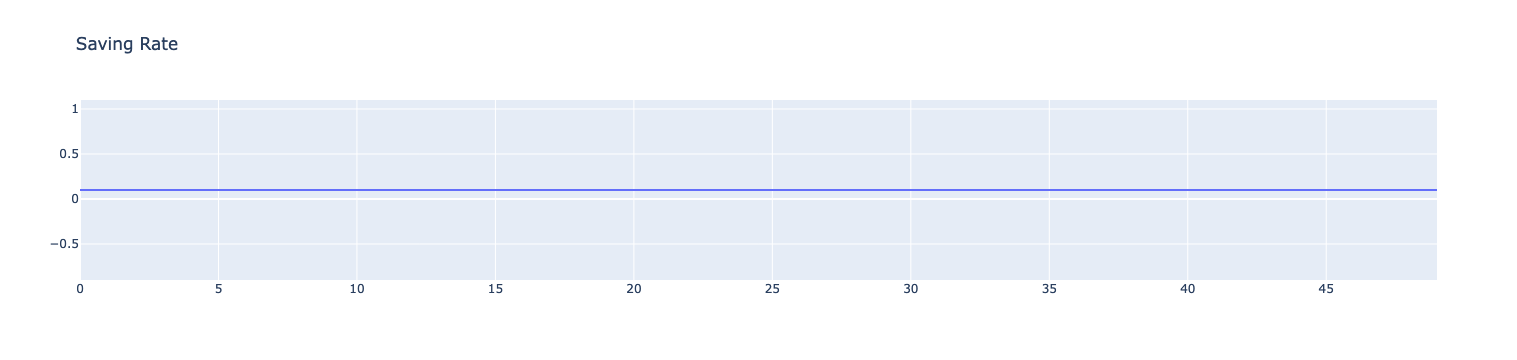

In [149]:
plot(m.time, [s.value], "Saving Rate", [""])

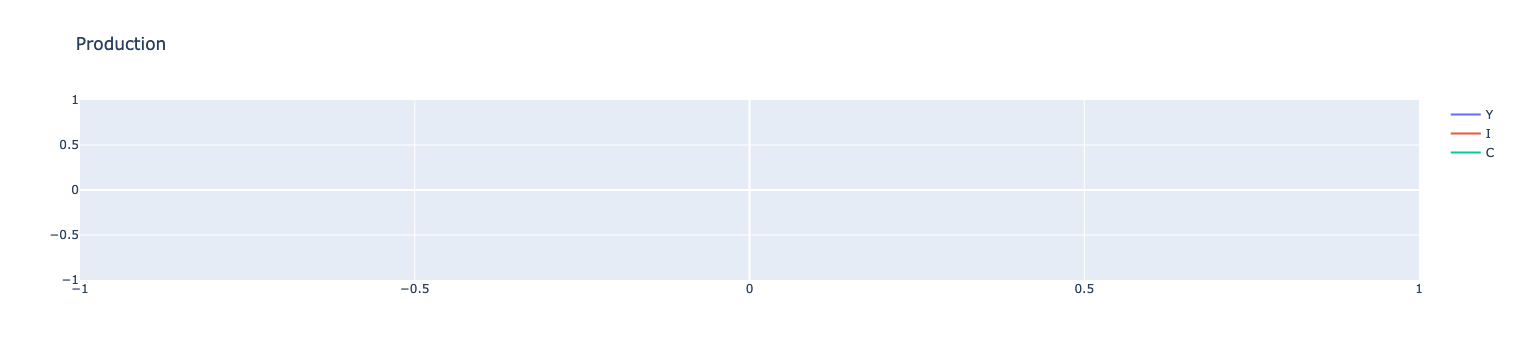

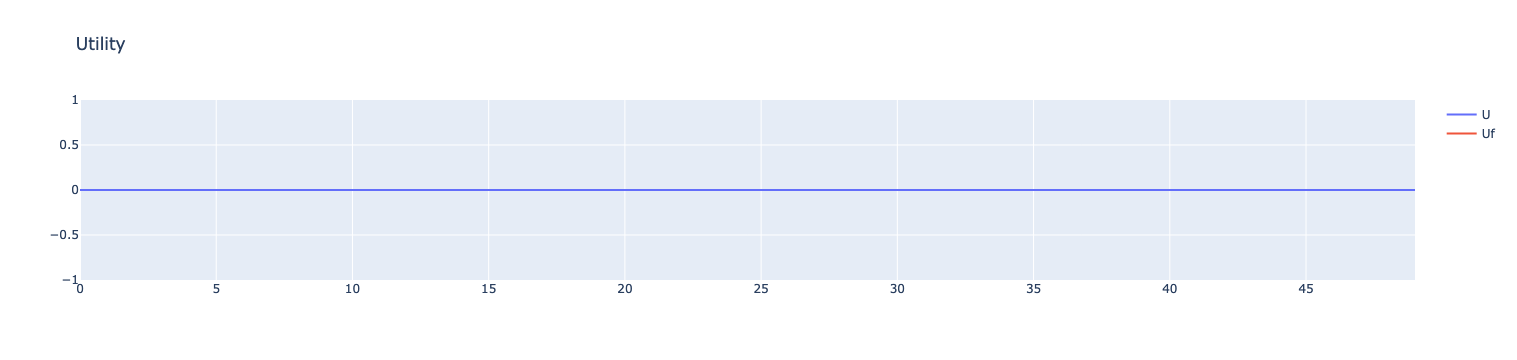

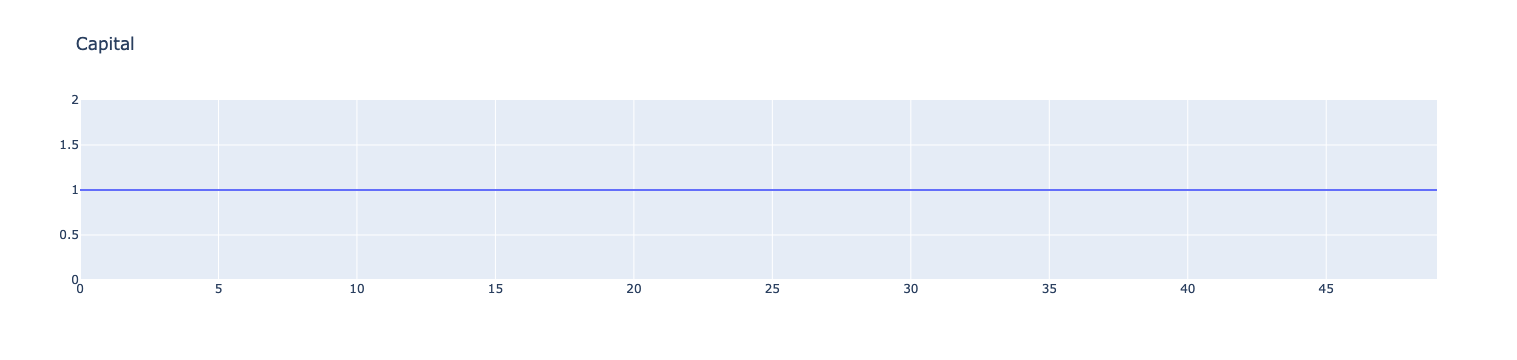

In [150]:
print("")
plot(m.time, [Y.value, I.value, C.value], "Production", ["Y", "I", "C"])
print("")
plot(m.time, [U.value, Uf.value], "Utility", ["U", "Uf"])
print("")
plot(m.time, [K.value], "Capital", ["K"])